In [1]:
import torch
import numpy
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torchvision import transforms
import torchvision.models as models
import torch.nn as nn
import os
# import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import warnings
import eval
import bleu
import utils
import string
import copy
import argparse
from torchinfo import summary
from models import *

[nltk_data] Downloading package wordnet to /home/corentin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
img_dir = './dataset/Flickr8k_Dataset/'
ann_dir = './dataset/Flickr8k_text/Flickr8k.token.txt'
train_dir = './dataset/Flickr8k_text/Flickr_8k.trainImages.txt'
val_dir = './dataset/Flickr8k_text/Flickr_8k.devImages.txt'
test_dir = './dataset/Flickr8k_text/Flickr_8k.testImages.txt'
vocab_file = './vocab.txt'


model = torch.load("./modelv2_saves/modelv2_checkpoint.pt")

summary(model)


Layer (type:depth-idx)                                  Param #
EncoderDecoder                                          --
├─Encoder: 1-1                                          --
│    └─Sequential: 2-1                                  --
│    │    └─Conv2d: 3-1                                 (9,408)
│    │    └─BatchNorm2d: 3-2                            (128)
│    │    └─ReLU: 3-3                                   --
│    │    └─MaxPool2d: 3-4                              --
│    │    └─Sequential: 3-5                             (147,968)
│    │    └─Sequential: 3-6                             (525,568)
│    │    └─Sequential: 3-7                             (2,099,712)
│    │    └─Sequential: 3-8                             (8,393,728)
│    └─AdaptiveAvgPool2d: 2-2                           --
├─TransformerDecoder: 1-2                               --
│    └─Embedding: 2-3                                   4,261,376
│    └─ModuleList: 2-4                                  --
│   

In [17]:

# voc
vocab = []
with open(vocab_file, "r") as vocab_f:
    for line in vocab_f:
        vocab.append(line.strip())
vocab.append("add")
vocab.append("add2")

liste = []
image_liste = []
test_data = eval.TestDataset(img_dir, test_dir, ann_dir, vocab_file)
test_dataloader = DataLoader(test_data, shuffle=False, collate_fn=eval.collater)
img_to_print = torch.tensor([1])
with torch.no_grad():
        for data in tqdm(test_dataloader):
            torch.cuda.empty_cache()
            
            images, captions = data
            image_liste.append(images)
            model.eval()
            a = model(images.cuda(), on_max='halt')
            liste.append(a)

vocab = numpy.array(vocab)





100%|███████████████████████████████████████| 1000/1000 [00:46<00:00, 21.60it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



------------


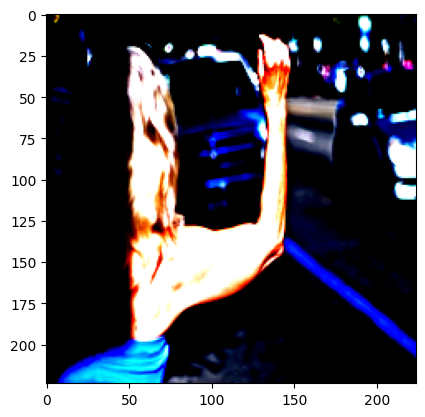

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[['a']
 ['child']
 ['lays']
 ['pink']
 ['child']
 ['jeans']
 ['blue']
 ['climbing']
 ['large']
 ['road']
 ['child']
 ['two']
 ['add2']]
[['a']
 ['child']
 ['lays']
 ['pink']
 ['child']
 ['jeans']
 ['blue']
 ['climbing']
 ['large']
 ['road']
 ['child']
 ['while']
 ['add2']]
[['a']
 ['child']
 ['lays']
 ['pink']
 ['child']
 ['jeans']
 ['blue']
 ['climbing']
 ['large']
 ['road']
 ['child']
 ['jean']
 ['add2']]

------------


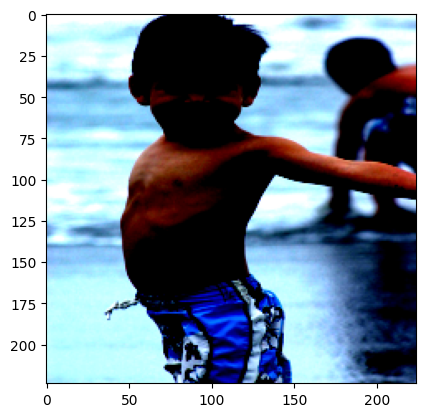

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[['a']
 ['child']
 ['outside']
 ['smiles']
 ['pink']
 ['child']
 ['jeans']
 ['blue']
 ['climbing']
 ['grassy']
 ['road']
 ['to']
 ['standing']
 ['add2']]
[['a']
 ['child']
 ['outside']
 ['smiles']
 ['pink']
 ['child']
 ['jeans']
 ['blue']
 ['climbing']
 ['grassy']
 ['road']
 ['to']
 ['four']
 ['road']]
[['a']
 ['child']
 ['outside']
 ['smiles']
 ['pink']
 ['child']
 ['jeans']
 ['blue']
 ['climbing']
 ['grassy']
 ['road']
 ['to']
 ['four']
 ['add2']]

------------


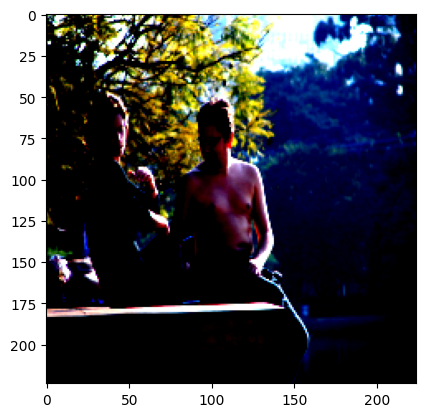

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[['a']
 ['child']
 ['lays']
 ['each']
 ['child']
 ['waters']
 ['fighting']
 ['large']
 ['road']
 ['child']
 ['performing']
 ['add2']]
[['a']
 ['child']
 ['lays']
 ['each']
 ['child']
 ['waters']
 ['fighting']
 ['large']
 ['road']
 ['child']
 ['while']
 ['add2']]
[['a']
 ['child']
 ['lays']
 ['pink']
 ['child']
 ['jeans']
 ['blue']
 ['climbing']
 ['large']
 ['road']
 ['child']
 ['while']]

------------


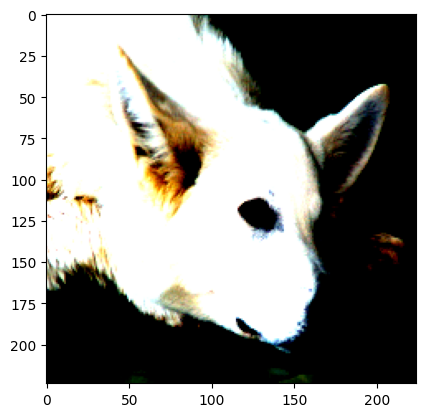

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[['a']
 ['child']
 ['brown']
 ['and']
 ['climbing']
 ['grassy']
 ['boston']
 ['to']
 ['field']
 ['add2']]
[['a']
 ['child']
 ['brown']
 ['and']
 ['climbing']
 ['grassy']
 ['pink']
 ['to']
 ['field']
 ['add2']]
[['a']
 ['child']
 ['brown']
 ['and']
 ['climbing']
 ['grassy']
 ['boston']
 ['to']
 ['hikers']
 ['add2']]

------------


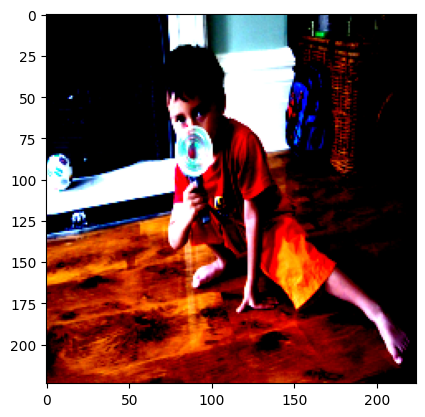

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[['a']
 ['child']
 ['playhouse']
 ['smiles']
 ['climbing']
 ['large']
 ['road']
 ['child']
 ['while']
 ['add2']]
[['a']
 ['child']
 ['playhouse']
 ['smiles']
 ['climbing']
 ['large']
 ['road']
 ['child']
 ['having']
 ['add2']]
[['a']
 ['child']
 ['playhouse']
 ['smiles']
 ['climbing']
 ['large']
 ['road']
 ['child']
 ['leaps']
 ['add2']]

------------


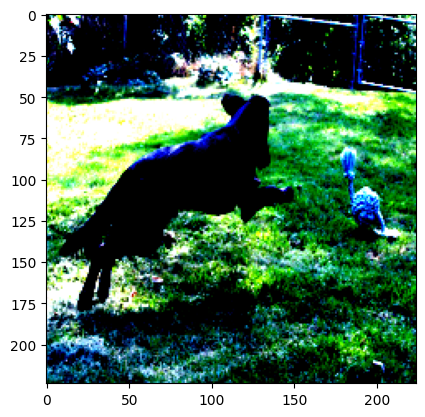

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[['a']
 ['child']
 ['dog']
 ['and']
 ['climbing']
 ['grassy']
 ['boston']
 ['to']
 ['plays']
 ['add2']]
[['a']
 ['child']
 ['dog']
 ['and']
 ['climbing']
 ['grassy']
 ['pink']
 ['to']
 ['plays']
 ['add2']]
[['a']
 ['child']
 ['dog']
 ['and']
 ['near']
 ['boston']
 ['to']
 ['plays']
 ['add2']
 ['add2']]

------------


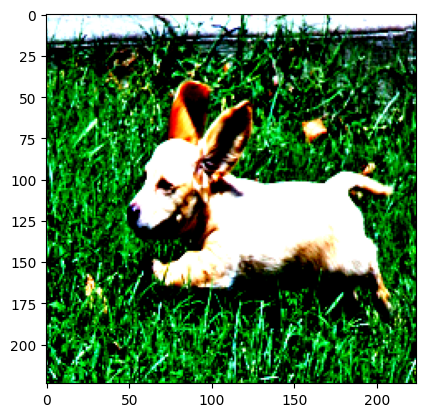

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[['a']
 ['child']
 ['spots']
 ['and']
 ['climbing']
 ['grassy']
 ['boston']
 ['to']
 ['plays']
 ['add2']]
[['a']
 ['child']
 ['spots']
 ['and']
 ['near']
 ['boston']
 ['to']
 ['plays']
 ['add2']
 ['add2']]
[['a']
 ['child']
 ['spots']
 ['and']
 ['climbing']
 ['grassy']
 ['pink']
 ['to']
 ['plays']
 ['add2']]

------------


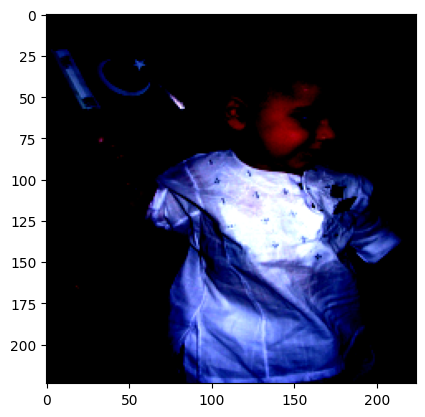

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[['a']
 ['child']
 ['in']
 ['climbing']
 ['large']
 ['road']
 ['child']
 ['having']
 ['add2']]
[['a']
 ['child']
 ['playhouse']
 ['ocean']
 ['fighting']
 ['with']
 ['each']
 ['child']
 ['their']]
[['a']
 ['child']
 ['playhouse']
 ['ocean']
 ['fighting']
 ['large']
 ['road']
 ['child']
 ['their']]

------------


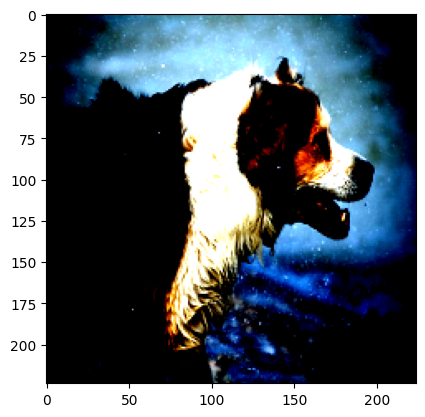

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[['a']
 ['child']
 ['spots']
 ['spotted']
 ['brown']
 ['child']
 ['kneeling']
 ['pink']
 ['head']
 ['toy']
 ['add2']]
[['a']
 ['child']
 ['spots']
 ['spotted']
 ['brown']
 ['child']
 ['kneeling']
 ['pink']
 ['to']
 ['edge']
 ['add2']]
[['a']
 ['child']
 ['spots']
 ['spotted']
 ['brown']
 ['child']
 ['edge']
 ['pink']
 ['to']
 ['bites']
 ['add2']]

------------


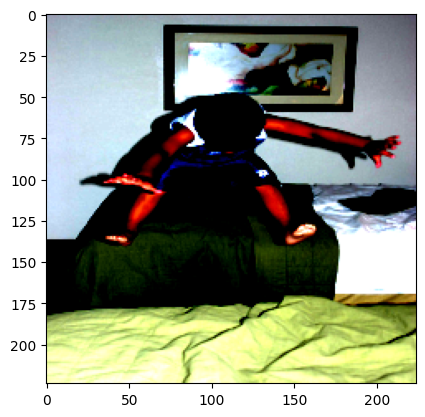

[['a']
 ['child']
 ['smiles']
 ['climbing']
 ['large']
 ['road']
 ['child']
 ['having']
 ['add2']]
[['a']
 ['child']
 ['lays']
 ['pink']
 ['to']
 ['jeans']
 ['blue']
 ['spotted']
 ['brown']]
[['a']
 ['child']
 ['smiles']
 ['climbing']
 ['large']
 ['road']
 ['child']
 ['while']
 ['road']]


In [18]:
for i in range(10):
    print("\n------------")
    image = image_liste[i][0].permute(1, 2, 0)
    plt.imshow(image.numpy())
    plt.show()

    print(vocab[liste[i][...,0].cpu().numpy()])
    print(vocab[liste[i][...,1].cpu().numpy()])
    print(vocab[liste[i][...,2].cpu().numpy()])